## Simple Exponential Smoothing

In [275]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics

In [276]:
df = pd.read_csv(r'data/FB.csv') # Facebook stock data from 2014 to 2019

In [277]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600
...,...,...,...,...,...,...,...
1254,2019-12-02,202.130005,202.179993,198.050003,199.699997,199.699997,11503400
1255,2019-12-03,197.600006,198.929993,195.080002,198.820007,198.820007,11595300
1256,2019-12-04,200.000000,200.029999,198.050003,198.710007,198.710007,8456300
1257,2019-12-05,199.860001,201.289993,198.210007,199.360001,199.360001,9740400


In [278]:
X = df['Close'] # Modeling will be done only for the Close column in the dataset

# Perform the train/test split
train = X.iloc[:-30]
test = X.iloc[-30:]


In [279]:
def timeseries_evaluation_metics_func(y_true, y_pred):
    # metrics.mean_absolute_percentage_error
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE(sklearn) is : {metrics.mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}', end='\n\n')

In [280]:
results = []

for i in [0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]:
    print(f'Fitting for smoothing level = {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v = fit_v.forecast(30)

    timeseries_evaluation_metics_func(test, fcst_pred_v)

    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    
    df3 = pd.DataFrame([{'smoothing parameter': i, 'RMSE': rmse}])
    results.append(df3)

result_df = pd.concat(results, ignore_index=True)

result_df.sort_values(by=['RMSE']).head(3)


Fitting for smoothing level = 0
Evaluation metric results:-
MSE is : 14123.11196903136
MAE is : 118.76366943333332
RMSE is : 118.84069996861918
MAPE(sklearn) is : 0.6079708542749399
MAPE is : 60.79708542749399
R2 is : -770.6370351163115

Fitting for smoothing level = 0.1
Evaluation metric results:-
MSE is : 130.19890782430633
MAE is : 10.578096050945016
RMSE is : 11.41047360210374
MAPE(sklearn) is : 0.05371184257014935
MAPE is : 5.371184257014935
R2 is : -6.113609198116427

Fitting for smoothing level = 0.2
Evaluation metric results:-
MSE is : 108.84519758407878
MAE is : 9.515377334756147
RMSE is : 10.432890183648958
MAPE(sklearn) is : 0.04826729569629682
MAPE is : 4.826729569629682
R2 is : -4.946917770998036

Fitting for smoothing level = 0.3
Evaluation metric results:-
MSE is : 101.81858360183577
MAE is : 9.13869749146715
RMSE is : 10.090519491177636
MAPE(sklearn) is : 0.04633748018445831
MAPE is : 4.633748018445831
R2 is : -4.563008361226736

Fitting for smoothing level = 0.4
Evalua

/opt/homebrew/Caskroom/miniconda/base/envs/pandas/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/pandas/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/pandas/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/pandas/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/opt/hom

,smoothing parameter,RMSE
10,1.0,9.878157
9,0.9,9.926882
8,0.8,10.008074


In [281]:
result_df

,smoothing parameter,RMSE
0,0.0,118.840700
1,0.1,11.410474
2,0.2,10.432890
3,0.3,10.090519
4,0.4,10.087624
5,0.5,10.136144
6,0.6,10.139199
7,0.7,10.088978
8,0.8,10.008074
9,0.9,9.926882


In [282]:
fitSES = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level=0.1, optimized=False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metics_func(test, fcst_gs_pred)

Evaluation metric results:-
MSE is : 130.19890782430633
MAE is : 10.578096050945016
RMSE is : 11.41047360210374
MAPE(sklearn) is : 0.05371184257014935
MAPE is : 5.371184257014935
R2 is : -6.113609198116427



In [283]:
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit(optimized=True, use_brute=True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metics_func(test, fcst_auto_pred)

Evaluation metric results:-
MSE is : 97.6804450085047
MAE is : 8.909413743182935
RMSE is : 9.88334179356885
MAPE(sklearn) is : 0.04516280800081328
MAPE is : 4.5162808000813275
R2 is : -4.336915060964006



In [284]:
fitSESauto.summary()

Dep. Variable:,endog,No. Observations:,1229
Model:,SimpleExpSmoothing,SSE,8965.774
Optimized:,True,AIC,2446.285
Trend:,None,BIC,2456.513
Seasonal:,None,AICC,2446.318
Seasonal Periods:,None,Date:,"Mon, 20 May 2024"
Box-Cox:,False,Time:,13:26:41
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9808446,alpha,True
initial_level,76.519997,l.0,False


In [285]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(1229, 1259)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")

df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(1229, 1259)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

In [286]:
df_fcst_auto_pred

,Close_auto_search
new_index,
1229,186.374253
1230,186.374253
1231,186.374253
1232,186.374253
1233,186.374253
1234,186.374253
1235,186.374253
1236,186.374253
1237,186.374253


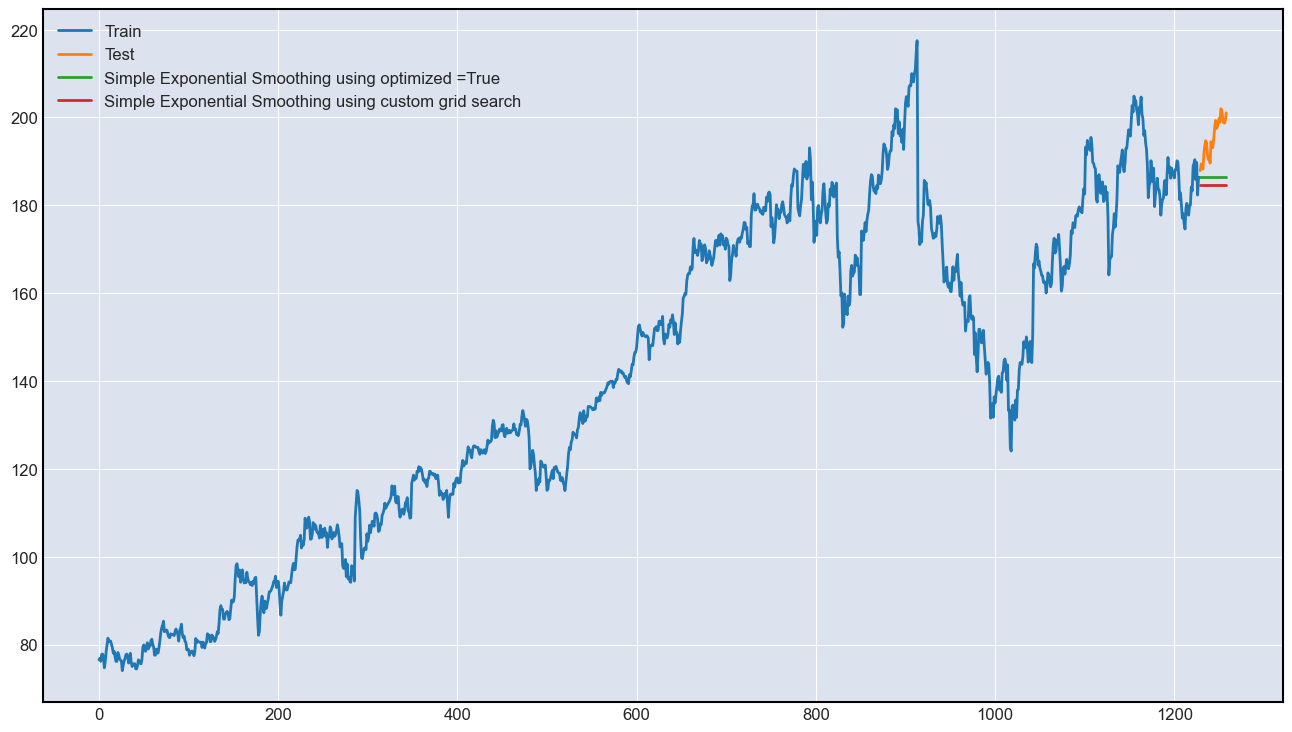

In [287]:
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True') 
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search') 
plt.legend(loc='best')
plt.show()

# We can clearly see that the simple exponential smoothing is NOT performing well 
# as the stock market data, which will have trends and seasonality.

## Double Exponential Smoothing

\begin{align*}
&S_t = \alpha * X_t + (1-\alpha) * (S_{t-1} + b_{t-1}) & (\text{Smooths the value of the series}) \\
&b_t = \beta * (S_t - S_{t-1}) + (1-\beta) * b_{t-1} & (\text{Smooths the trend of the series}) \\
&\hat{X}_{t+1} = S_t + b_t & (\text{Future prediction of series = sum of value and trend})
\end{align*}

In [288]:
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt

In [289]:
df = pd.read_csv('Data/FB.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


In [290]:
# Modeling will be done only for the Close column in the dataset
# Perform the train/test split
train = df.Close[:-30]
test = df.Close[-30:]

In [291]:
from sklearn.model_selection import ParameterGrid

# 추세 성분(trend)을 감쇠시키는 옵션을 설정하는 데 사용됩니다. 
# 이 변수는 추세가 무한정 지속되는 것을 방지하고, 시간이 지남에 따라 추세가 점점 줄어들도록 합니다.
# 값이 1에 가까울수록 추세가 덜 감쇠되고 지속됩니다.
# 값이 0에 가까울수록 추세가 더 빠르게 감쇠됩니다.

param_grid = {'smoothing_level': [0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90],
              'smoothing_slope': [0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90],
              'damping_slope': [0, 0.10, 0.2 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90], 
              'damped': [True, False]}

pg = list(ParameterGrid(param_grid))
len(pg)

2000

In [292]:
df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope', 'damped', 'RMSE', 'r2'])

start = timer()

for a,b in enumerate(pg) :
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    # print (smoothing_level, smoothing_slope, damping_slope, damped)
    fit1 = Holt(train, damped_trend=damped).fit(smoothing_level=smoothing_level, 
                                           smoothing_slope=smoothing_slope,
                                           damping_slope = damping_slope, 
                                           optimized=False)
    #fit1. summary
    z = fit1. forecast(30)
    # print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    rmse = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    # print(f'RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni.loc[a] = {'smoothing_level':smoothing_level, 
                                              'smoothing_slope':smoothing_slope,
                                              'damping_slope': damping_slope, 
                                              'damped': damped, 
                                              'RMSE': rmse, 
                                              'r2':r2}
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')
print(f' Below mentioned parameter gives least RMSE and 12')
df_results_moni.sort_values (by=['RMSE', 'r2']).head(1)

/var/folders/vg/0cvhzl1x62s7r9y4b3xbzvdr0000gn/T/ipykernel_87284/2662358348.py:11: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train, damped_trend=damped).fit(smoothing_level=smoothing_level,
/opt/homebrew/Caskroom/miniconda/base/envs/pandas/lib/python3.12/site-packages/pandas/util/_decorators.py:213: FutureWarning: the 'damping_slope' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
/var/folders/vg/0cvhzl1x62s7r9y4b3xbzvdr0000gn/T/ipykernel_87284/2662358348.py:11: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train, damped_trend=damped).fit(smoothing_level=smoothing_level,
/opt/homebrew/Caskroom/miniconda/base/envs/pandas/lib/python3.12/site-packages/pandas/util/_decorators.py:213: FutureWarning: the 'damping_slope' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
/var/folders/vg/0cvhzl1x62s7r9y4b3xb

 Total time taken to complete grid search in seconds: 16.457284624921158
 Below mentioned parameter gives least RMSE and 12


/var/folders/vg/0cvhzl1x62s7r9y4b3xbzvdr0000gn/T/ipykernel_87284/2662358348.py:11: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train, damped_trend=damped).fit(smoothing_level=smoothing_level,
/opt/homebrew/Caskroom/miniconda/base/envs/pandas/lib/python3.12/site-packages/pandas/util/_decorators.py:213: FutureWarning: the 'damping_slope' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
/var/folders/vg/0cvhzl1x62s7r9y4b3xbzvdr0000gn/T/ipykernel_87284/2662358348.py:11: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train, damped_trend=damped).fit(smoothing_level=smoothing_level,
/opt/homebrew/Caskroom/miniconda/base/envs/pandas/lib/python3.12/site-packages/pandas/util/_decorators.py:213: FutureWarning: the 'damping_slope' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
/var/folders/vg/0cvhzl1x62s7r9y4b3xb

,smoothing_level,smoothing_slope,damping_slope,damped,RMSE,r2
1096,0.9,0.6,0.0,False,2.176486,0.741182


In [293]:
# df_results_moni[(df_results_moni['smoothing_level']==0.9) & (df_results_moni['smoothing_slope']==0.6)]

In [294]:
fit1 = Holt(train, damped_trend=False).fit(smoothing_level=0.9, smoothing_slope=0.6, optimized=False)
Forecast_custom_pred = fit1.forecast(30)
fit1.summary()

/var/folders/vg/0cvhzl1x62s7r9y4b3xbzvdr0000gn/T/ipykernel_87284/2880902438.py:1: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train, damped_trend=False).fit(smoothing_level=0.9, smoothing_slope=0.6, optimized=False)


Dep. Variable:,Close,No. Observations:,1229
Model:,Holt,SSE,12220.966
Optimized:,False,AIC,2830.954
Trend:,Additive,BIC,2851.410
Seasonal:,None,AICC,2831.023
Seasonal Periods:,None,Date:,"Mon, 20 May 2024"
Box-Cox:,False,Time:,13:26:57
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_trend,0.6000000,beta,False


In [295]:
timeseries_evaluation_metics_func(test, Forecast_custom_pred)

Evaluation metric results:-
MSE is : 4.737090445686715
MAE is : 1.8121525217302623
RMSE is : 2.1764858018573694
MAPE(sklearn) is : 0.009266024548104875
MAPE is : 0.9266024548104875
R2 is : 0.7411820826314525



In [367]:
fitESAUTO = Holt(train).fit(optimized=True, use_brute=True)
print(fitESAUTO.summary())
fitESAUTOpred = fitESAUTO.forecast(30)
timeseries_evaluation_metics_func(test, fitESAUTOpred)

                              Holt Model Results                              
Dep. Variable:                  Close   No. Observations:                 1229
Model:                           Holt   SSE                           8984.644
Optimized:                       True   AIC                           2452.869
Trend:                       Additive   BIC                           2473.325
Seasonal:                        None   AICC                          2452.938
Seasonal Periods:                None   Date:                 Mon, 20 May 2024
Box-Cox:                        False   Time:                         14:25:53
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9811693                alpha                 True
smoothing_trend            0.0018245                

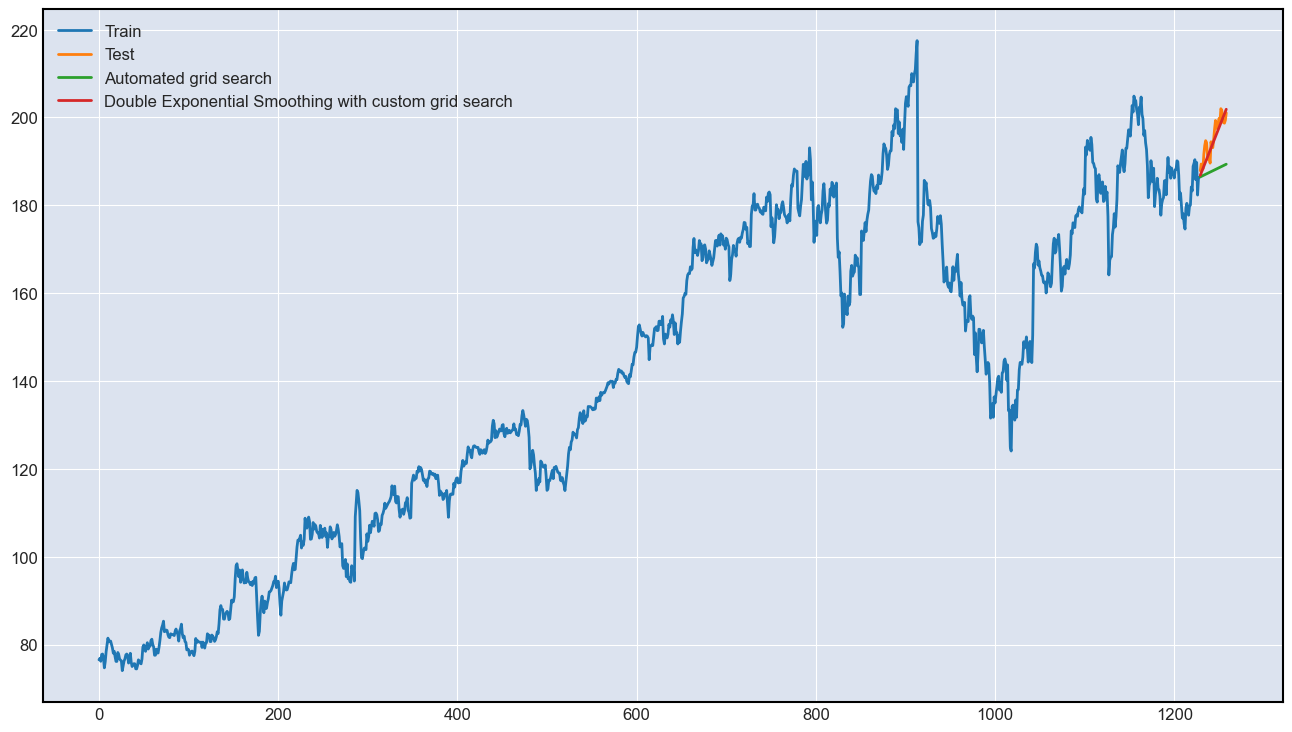

In [298]:
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search') 
plt.plot(Forecast_custom_pred, label='Double Exponential Smoothing with custom grid search') 
plt.legend(loc='best')
plt.show()

## Triple Exponential Smoothing

<!-- 
\begin{align*}
&S_t = \alpha * X_t + (1-\alpha) * (S_{t-1} + b_{t-1}) & (\text{Smooths the value of the series}) \\
&b_t = \beta * (S_t - S_{t-1}) + (1-\beta) * b_{t-1} & (\text{Smooths the trend of the series}) \\
&\hat{X}_{t+1} = S_t + b_t & (\text{Future prediction of series = sum of value and trend})
\end{align*} -->

In [401]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing 
# 월별 데이터에서 매년 반복되는 패턴이라면 seasonal_periods=12
# 일별 데이터에서 매주 반복되는 패턴이라면 seasonal_periods=7

param_grid = {'trend':['add', 'mul'],
              'seasonal': ['add', 'mul'],
              'seasonal_periods': [3, 4],
              'smoothing_level': [0.10, 0.60, 0.90],
              'smoothing_slope': [0.10, 0.30, 0.50, 0.6],
              'smoothing_seasonal': [0, 0.05, 0.1],
              'damping_slope': [0.10, 0.9], 
              'damped': [True, False]}

pg = list(ParameterGrid(param_grid))
len(pg)

1152

In [399]:
df_results_moni = pd.DataFrame(columns=['trend', 'seasonal', 'seasonal_periods', 'smoothing_level', 'smoothing_slope', 'smoothing_seasonal', 'damping_slope', 'damped', 'RMSE', 'r2'])

start = timer()

for a,b in enumerate(pg) :
    trend = b.get('trend')
    seasonal = b.get('seasonal')
    seasonal_periods = b.get('seasonal_periods')
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    smoothing_seasonal = b.get('smoothing_seasonal')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    fit1 = ExponentialSmoothing(train, 
                                trend=trend,
                                seasonal=seasonal,
                                damped_trend=damped,
                                seasonal_periods=seasonal_periods,
                                use_boxcox=True).fit(smoothing_level=smoothing_level, 
                                                                       smoothing_slope=smoothing_slope,
                                                                       smoothing_seasonal=smoothing_seasonal,
                                                                       damping_slope = damping_slope, 
                                                                       method='basinhopping',
                                                                       optimized=False)
    #fit1. summary
    z = fit1.forecast(30)

    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    rmse = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)

    df_results_moni.loc[a] = {'trend': trend,
                              'seasonal': seasonal, 
                              'seasonal_periods': seasonal_periods,
                              'smoothing_level':smoothing_level, 
                              'smoothing_slope':smoothing_slope,
                              'smoothing_seasonal':smoothing_seasonal,
                              'damping_slope': damping_slope, 
                              'damped': damped, 
                              'RMSE': rmse, 
                              'r2':r2}
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')
print(f' Below mentioned parameter gives least RMSE and 12')
df_results_moni.sort_values (by=['RMSE', 'r2']).head(1)

/var/folders/vg/0cvhzl1x62s7r9y4b3xbzvdr0000gn/T/ipykernel_87284/543097081.py:19: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  use_boxcox=True).fit(smoothing_level=smoothing_level,
/opt/homebrew/Caskroom/miniconda/base/envs/pandas/lib/python3.12/site-packages/pandas/util/_decorators.py:213: FutureWarning: the 'damping_slope' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
/var/folders/vg/0cvhzl1x62s7r9y4b3xbzvdr0000gn/T/ipykernel_87284/543097081.py:19: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  use_boxcox=True).fit(smoothing_level=smoothing_level,
/opt/homebrew/Caskroom/miniconda/base/envs/pandas/lib/python3.12/site-packages/pandas/util/_decorators.py:213: FutureWarning: the 'damping_slope' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
/var/folders/vg/0cvhzl1x62s7r9y4b3xbzvdr0000gn/T/ipykernel_87284/543097081.py:19: Fu

 Total time taken to complete grid search in seconds: 24.973158000037074
 Below mentioned parameter gives least RMSE and 12


/var/folders/vg/0cvhzl1x62s7r9y4b3xbzvdr0000gn/T/ipykernel_87284/543097081.py:19: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  use_boxcox=True).fit(smoothing_level=smoothing_level,
/opt/homebrew/Caskroom/miniconda/base/envs/pandas/lib/python3.12/site-packages/pandas/util/_decorators.py:213: FutureWarning: the 'damping_slope' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
/var/folders/vg/0cvhzl1x62s7r9y4b3xbzvdr0000gn/T/ipykernel_87284/543097081.py:19: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  use_boxcox=True).fit(smoothing_level=smoothing_level,
/opt/homebrew/Caskroom/miniconda/base/envs/pandas/lib/python3.12/site-packages/pandas/util/_decorators.py:213: FutureWarning: the 'damping_slope' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)


,trend,seasonal,seasonal_periods,smoothing_level,smoothing_slope,smoothing_seasonal,damping_slope,damped,RMSE,r2
714,add,add,4,0.9,0.3,0.1,0.1,False,2.26351,0.720071


In [394]:
# df_results_moni[(df_results_moni['smoothing_level']==0.9) & (df_results_moni['smoothing_slope']==0.6)]

In [400]:
fit1 = ExponentialSmoothing(train, 
                            trend='add',
                            seasonal='add',
                            seasonal_periods=4,
                            damped_trend=False,
                            use_boxcox=True).fit(smoothing_level=0.9,
                                                    smoothing_slope=0.3,
                                                    smoothing_seasonal=0.1,
                                                    # damping_slope=0.1,
                                                    method='basinhopping',
                                                    optimized=False)

Forecast_custom_pred = fit1.forecast(30)
fit1.summary()
timeseries_evaluation_metics_func(test, Forecast_custom_pred)

Evaluation metric results:-
MSE is : 5.123475559469085
MAE is : 1.9017431215268763
RMSE is : 2.263509566904696
MAPE(sklearn) is : 0.009723142581961712
MAPE is : 0.9723142581961712
R2 is : 0.7200713625390339



/var/folders/vg/0cvhzl1x62s7r9y4b3xbzvdr0000gn/T/ipykernel_87284/1293906140.py:6: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  use_boxcox=True).fit(smoothing_level=0.9,


In [384]:
fitESAUTO = Holt(train).fit(optimized=True, use_brute=True)
print(fitESAUTO.summary())
fitESAUTOpred = fitESAUTO.forecast(30)
timeseries_evaluation_metics_func(test, fitESAUTOpred)

                              Holt Model Results                              
Dep. Variable:                  Close   No. Observations:                 1229
Model:                           Holt   SSE                           8984.644
Optimized:                       True   AIC                           2452.869
Trend:                       Additive   BIC                           2473.325
Seasonal:                        None   AICC                          2452.938
Seasonal Periods:                None   Date:                 Mon, 20 May 2024
Box-Cox:                        False   Time:                         14:43:49
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9811693                alpha                 True
smoothing_trend            0.0018245                

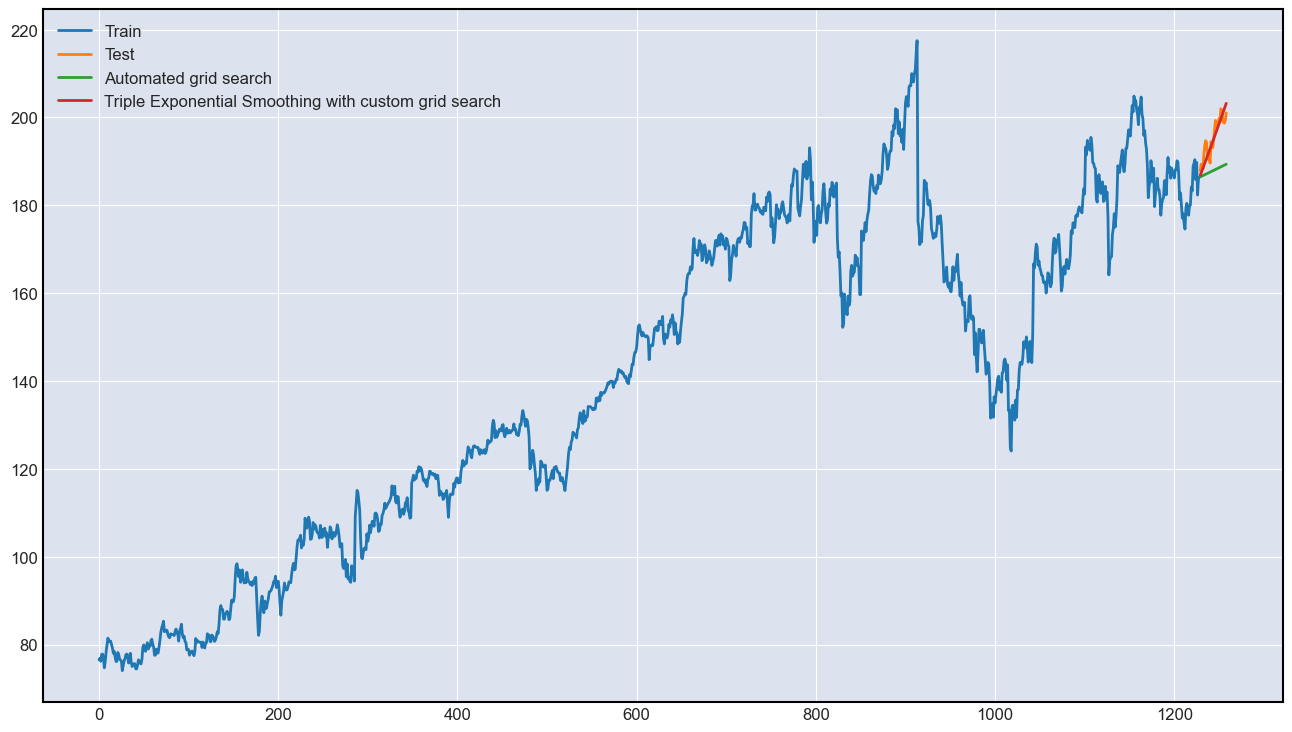

In [385]:
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search') 
plt.plot(Forecast_custom_pred, label='Triple Exponential Smoothing with custom grid search') 
plt.legend(loc='best')
plt.show()

## Plotting moving averages

### Mplfinance

In [304]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf

In [305]:
# Download Apple stock price data from Yahoo Finance
symbol = 'AAPL'
df = yf.download(symbol, period='6mo')

[*********************100%%**********************]  1 of 1 completed


In [306]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-20,189.889999,191.910004,189.880005,191.449997,190.947021,46505100
2023-11-21,191.410004,191.520004,189.740005,190.639999,190.139145,38134500
2023-11-22,191.490005,192.929993,190.830002,191.309998,190.807404,39617700
2023-11-24,190.869995,190.899994,189.250000,189.970001,189.470901,24048300
2023-11-27,189.919998,190.669998,188.899994,189.789993,189.291367,40552600
...,...,...,...,...,...,...
2024-05-13,185.440002,187.100006,184.619995,186.279999,186.279999,72044800
2024-05-14,187.509995,188.300003,186.289993,187.429993,187.429993,52393600
2024-05-15,187.910004,190.649994,187.369995,189.720001,189.720001,70400000


- OHLC plot

<img src="image/ohlc.png" alt="drawing" style="width:550px;"/>

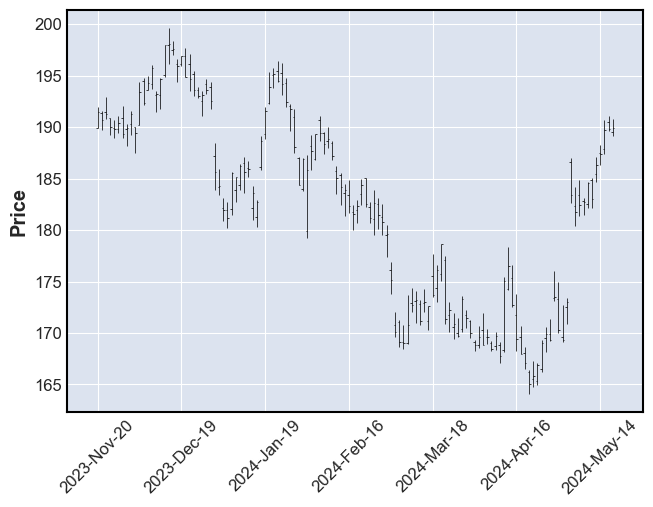

In [307]:
# Plot the OHLC data
mpf.plot(df)

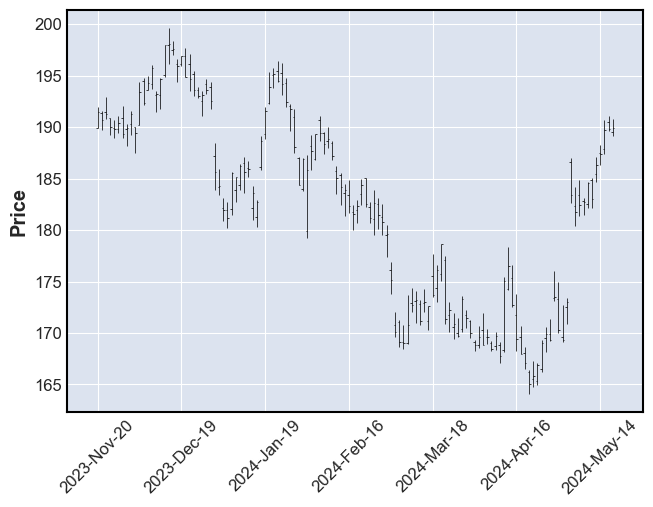

In [308]:
mpf.plot(df, type='ohlc')

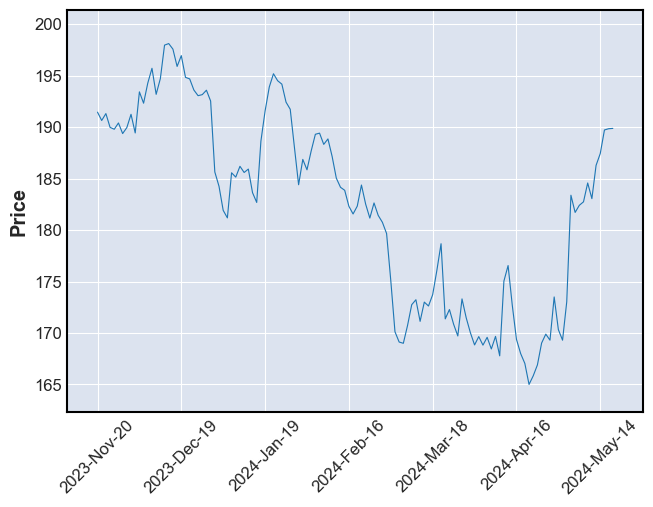

In [309]:
mpf.plot(df, type='line')

- https://www.investopedia.com/trading/candlestick-charting-what-is-it/
<!-- ![candle](image/candle.png) -->
<img src="image/candle.png" alt="drawing" style="width:550px;"/>

- The candlestick has a wide part called the "real body".
- This body represents the price range.
- If filled, it means the close was lower than the open, and vice versa.

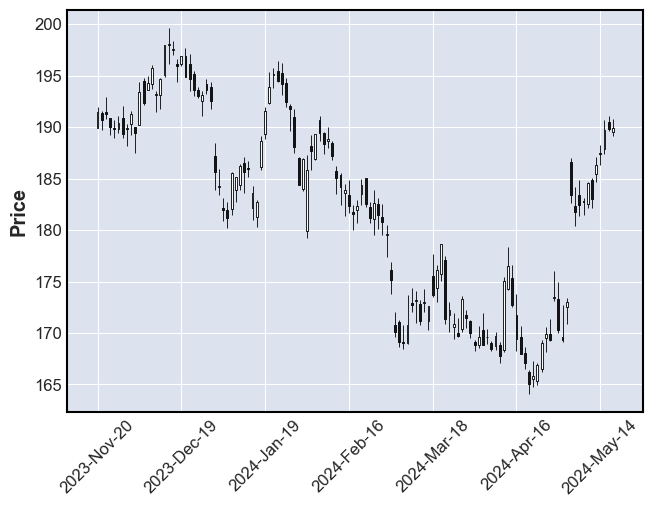

In [310]:
# Plot candlestick chart
mpf.plot(df, type='candle')

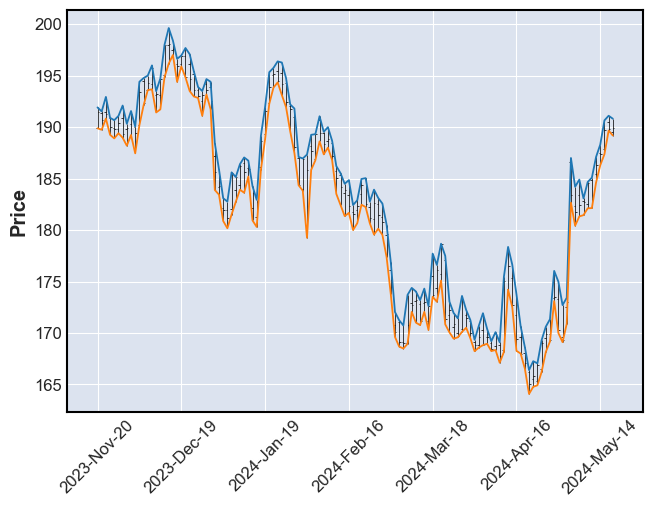

In [311]:
# Plot high and low columns with candlestick chart
highlow = mpf.make_addplot(df[['High', 'Low']])
mpf.plot(df, addplot=highlow)

### Add moving averages and volume

- Simple moving average

<img src="image/sma.png" alt="drawing" style="width:500px;"/>

- Weighted moving average

<img src="image/wma.png" alt="drawing" style="width:750px;"/>

- Exponentially weighted moving average

<img src="image/ewma.png" alt="drawing" style="width:550px;"/>

- It is easy to add MAs and volume to the chart with mplfinance.

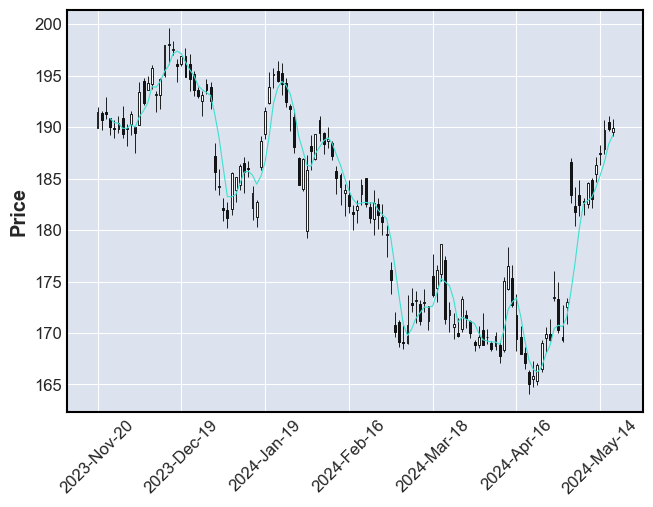

In [312]:
# Simple moving average
mpf.plot(df, type='candle', mav=4)

- You can add two or more MAs.

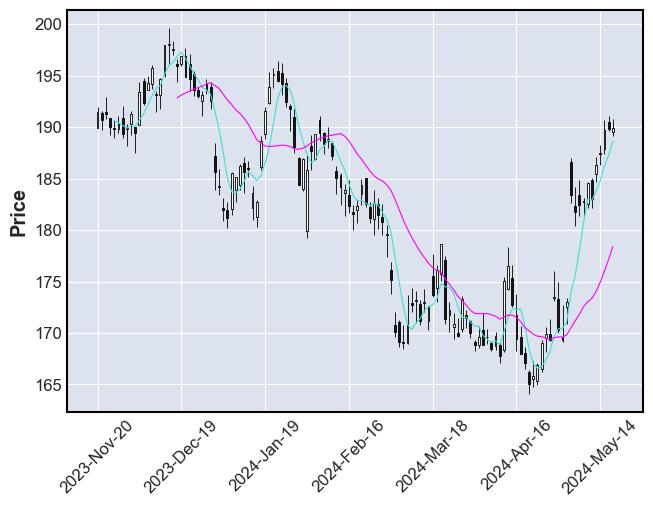

In [313]:
mpf.plot(df, type='candle', mav=(5, 20))

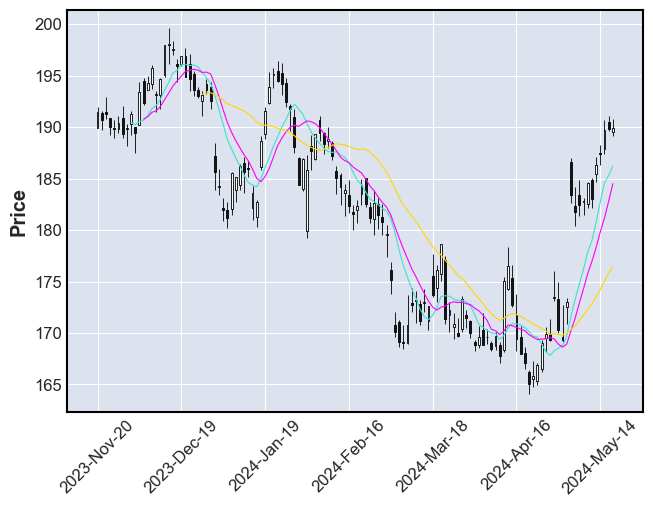

In [314]:
mpf.plot(df, type='candle', mav=(9, 12, 26))

- We can also display volume.

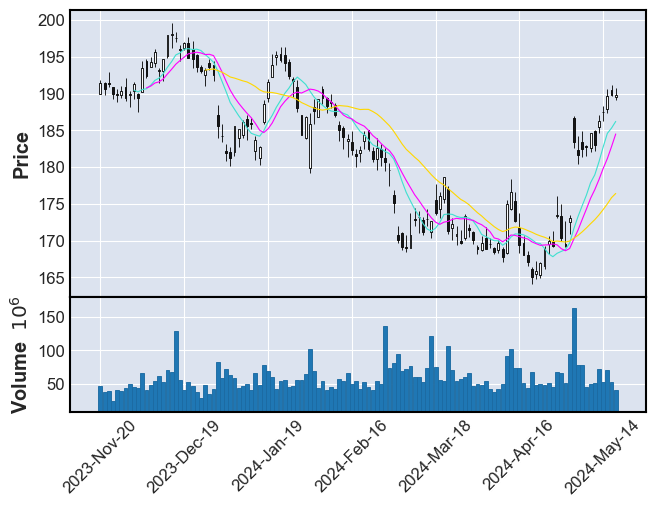

In [315]:
mpf.plot(df, type='candle', mav=(9, 12, 26), volume=True)

- In the above chart, there are no gaps along the x-coordinate, even though there are days on which there was no trading.
- Non-trading days are simply not shown.
- However, sometimes people like to see these gaps, so that they can tell, with a quick glance, where the weekends and holidays fall.

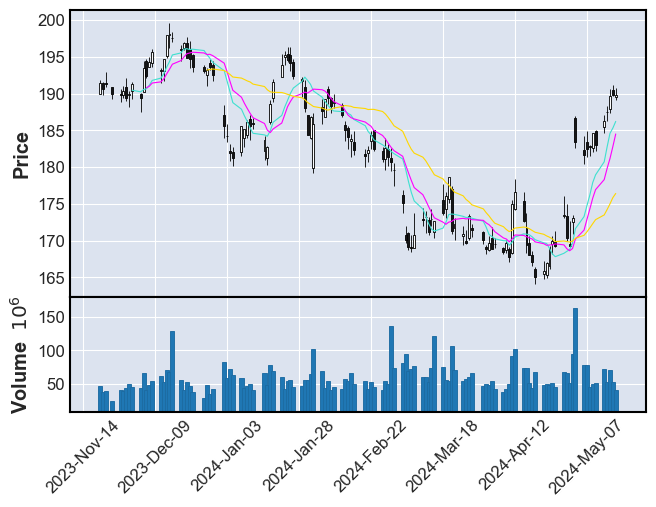

In [316]:
mpf.plot(df, type='candle', mav=(9, 12, 26), volume=True, show_nontrading=True)

- Note that the mav argument in the plot method is only for simple moving average (SMA).
- To plot other types of MA like EWMA, we need to calculate and add it to the chart separately.

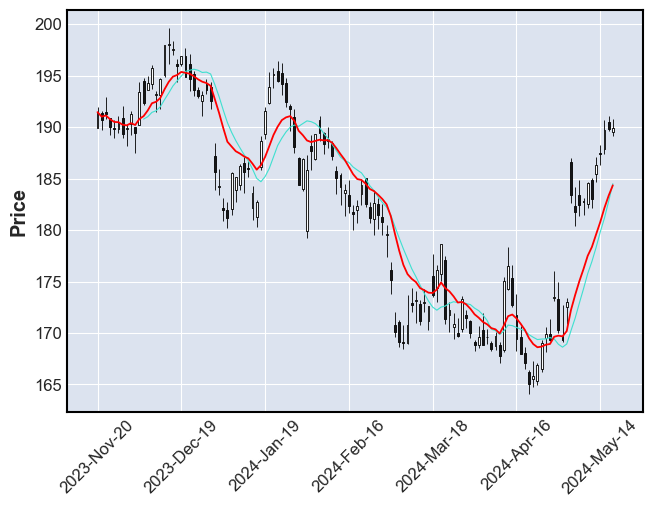

In [317]:
# Exponentially weighted moving average
# Copy df to a new dataframe df2
df2 = df.copy()
df2['ema12'] = df2['Close'].ewm(span=12).mean()
ema12plot = mpf.make_addplot(df2['ema12'], color ='red', ylabel='EMA12')
mpf.plot(df2, type='candle', mav=12, addplot=ema12plot)

- Exponentially weighted moving average

<img src="image/ewma.png" alt="drawing" style="width:550px;"/>

- Span

<img src="image/span.png" alt="drawing" style="width:475px;"/>

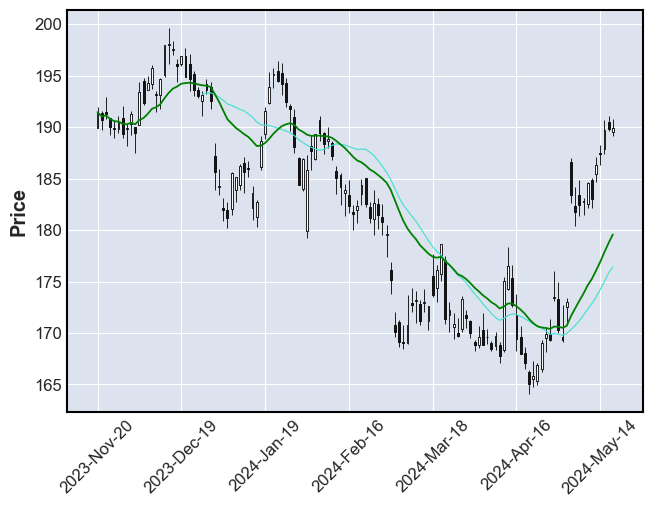

In [318]:
df2['ema26'] = df2['Close'].ewm(span=26).mean()
ema26plot = mpf.make_addplot(df2['ema26'], color ='green', ylabel='EMA26')
mpf.plot(df2, type='candle', mav=26, addplot=ema26plot)

#### Practice with Google stock data

In [319]:
# 6-month stock price data for Google
google = yf.download('GOOG', period='6mo')

[*********************100%%**********************]  1 of 1 completed


Practice
1. Draw the candle chart.
2. Plot the simple moving average with multiple periods.
3. Plot the exponential moving averages with 12 days and 26 days.
4. Plot the difference between EMAs with periods of 12 and 26 days.

1. Draw the candle chart.

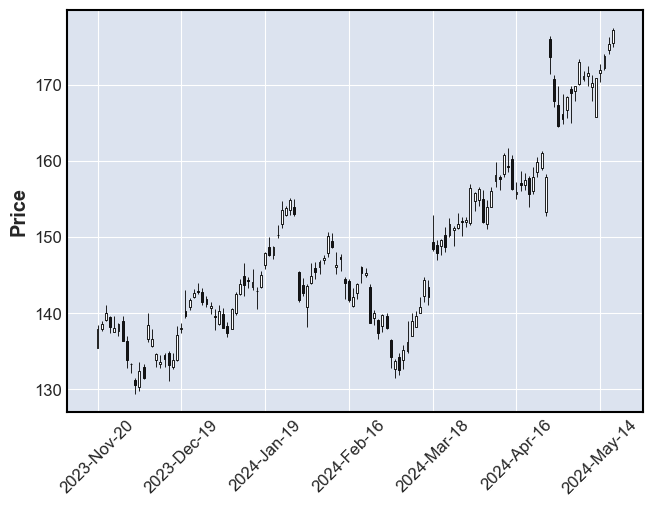

In [320]:
mpf.plot(google, type='candle')

2. Plot the simple moving average with multiple periods. 

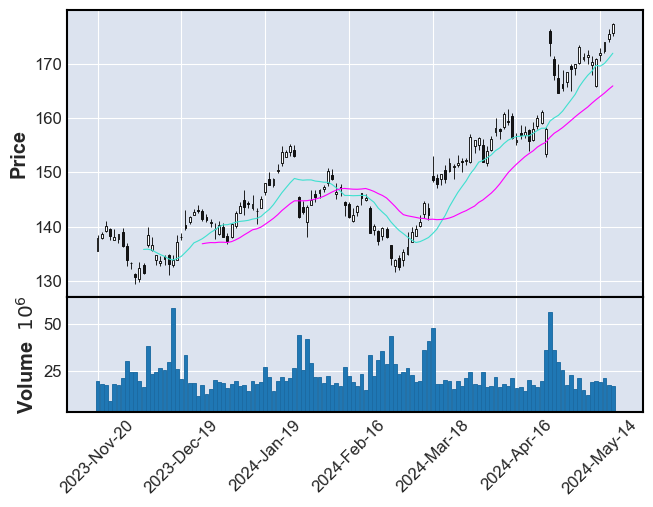

In [321]:
mpf.plot(google, type='candle', mav=(12, 26), volume=True)

3. Plot the exponential moving average.

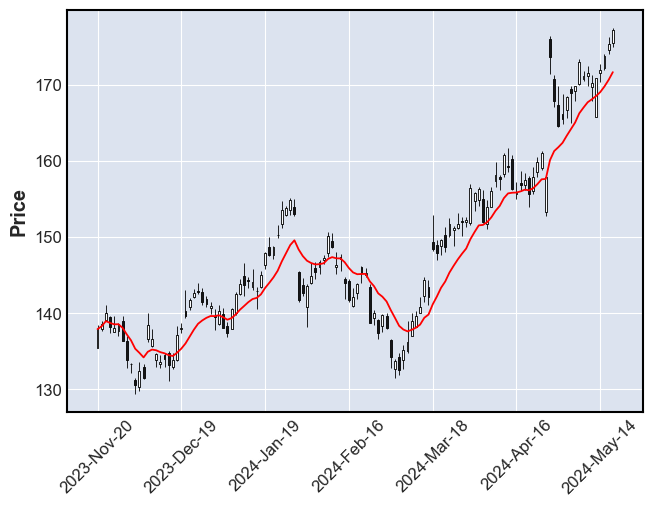

In [322]:
google['ewm12'] = google['Close'].ewm(span=12).mean()
ewm12plot = mpf.make_addplot(google['ewm12'], color ='red')
mpf.plot(google, type='candle', addplot=ewm12plot)

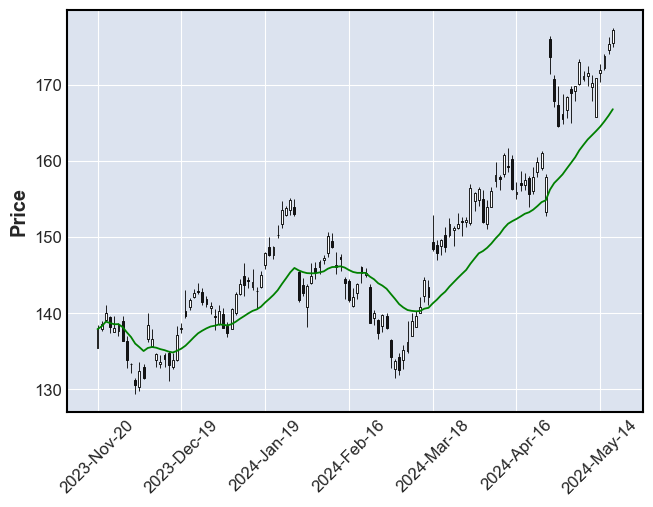

In [323]:
google['ewm26'] = google['Close'].ewm(span=26).mean()
ewm26plot = mpf.make_addplot(google['ewm26'], color ='green')
mpf.plot(google, type='candle', addplot=ewm26plot)

4. Plot the difference between 2 MAs.

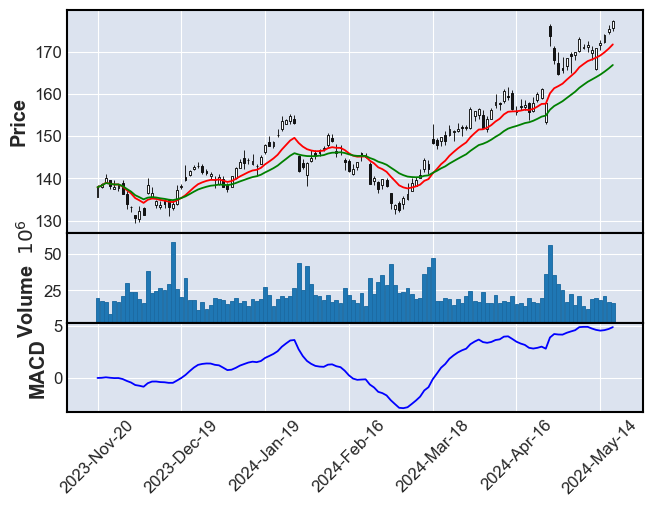

In [324]:
google['macd'] = google['ewm12'] - google['ewm26']
macdplot = mpf.make_addplot(google['macd'], color='blue', panel=2, ylabel='MACD')
mpf.plot(google, type='candle', volume=True, addplot=[macdplot, ewm12plot, ewm26plot])

#### Tesla stock data

In [325]:
tesla = yf.download('TSLA', period='6mo')
tesla

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-20,234.039993,237.100006,231.020004,235.600006,235.600006,116320100
2023-11-21,235.039993,243.619995,233.339996,241.199997,241.199997,122288000
2023-11-22,242.039993,244.009995,231.399994,234.210007,234.210007,117950600
2023-11-24,233.750000,238.750000,232.330002,235.449997,235.449997,65125200
2023-11-27,236.889999,238.330002,232.100006,236.080002,236.080002,112031800
...,...,...,...,...,...,...
2024-05-13,170.000000,175.399994,169.000000,171.889999,171.889999,67018900
2024-05-14,174.500000,179.490005,174.070007,177.550003,177.550003,86407400
2024-05-15,179.899994,180.000000,173.110001,173.990005,173.990005,79663000


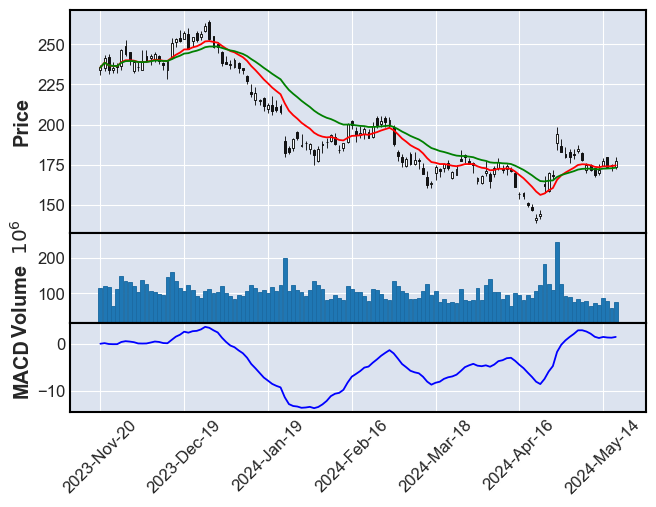

In [326]:
ewm12plot = mpf.make_addplot(tesla['Close'].ewm(span=12).mean(), color ='red', panel=0)
ewm26plot = mpf.make_addplot(tesla['Close'].ewm(span=26).mean(), color ='green', panel=0)
macdplot = mpf.make_addplot(tesla['Close'].ewm(span=12).mean() - tesla['Close'].ewm(span=26).mean(), 
                            color='blue', panel=2, ylabel='MACD')
mpf.plot(tesla, type='candle', addplot=[ewm12plot, ewm26plot, macdplot], volume=True)